In [262]:
#libraries preparetion
import warnings
warnings.filterwarnings("ignore") #dont wanna se warning
import numpy as np
import pandas as pd 
import seaborn as sns
sns.set(style="white",context="notebook",palette="muted")
import matplotlib.pyplot as plt

train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

In [263]:
#data info in general
#print("describe train:\n",train.describe())
print("shape train:",train.shape)
print("shape train:",test.shape)

shape train: (891, 12)
shape train: (418, 11)


In [264]:
#null values in data
full = train.append(test,ignore_index=True)
full.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,655.000000,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


In [265]:
#null values in data
full.info()
"""There are 4 types of data having missing values, Cabin 1000+, age 200+, Embarked 2, Fare 1"""


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


'There are 4 types of data having missing values, Cabin 1000+, age 200+, Embarked 2, Fare 1'

Survivate rate: 0.33695652173913043 of passengers from embarkation : S
Survivate rate: 0.5535714285714286 of passengers from embarkation : C
Survivate rate: 0.38961038961038963 of passengers from embarkation : Q


'High survivel rate for passengers from C,cherbourg'

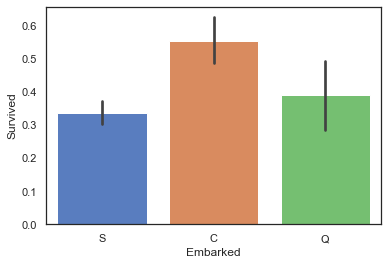

In [266]:
#correlation from features to result
sns.barplot(data = train, x = "Embarked",y="Survived" )
for e in ["S","C","Q"]:
    print("Survivate rate: {} of passengers from embarkation : {}".format(full["Survived"][full["Embarked"]==e].value_counts(normalize=True)[1],e))

"""High survivel rate for passengers from C,cherbourg"""

'More C passengers stays in 1st class '

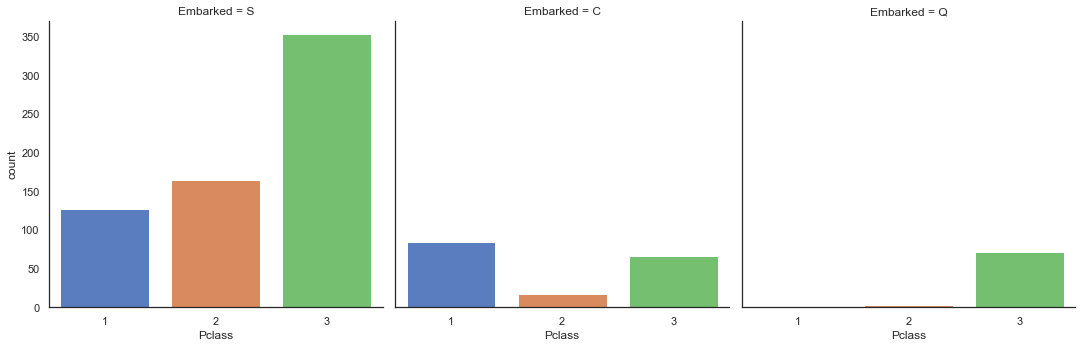

In [267]:
sns.catplot(data = train,  x="Pclass",col="Embarked", kind="count")
"""More C passengers stays in 1st class """

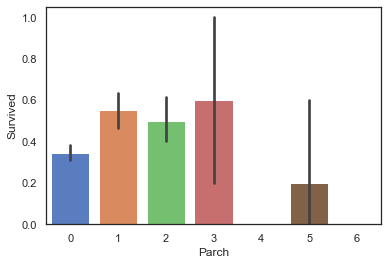

In [268]:
sns.barplot(data=train,x = "Parch",y="Survived")

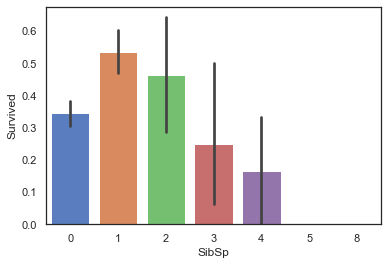

In [269]:
sns.barplot(data=train,x = "SibSp",y="Survived")

'females are more likely to survive'

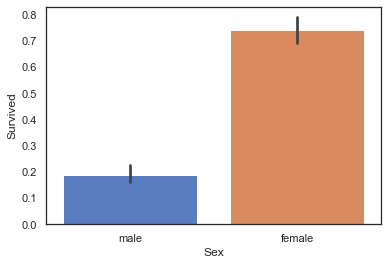

In [270]:
sns.barplot(data=train,x='Sex',y='Survived')
"""females are more likely to survive"""

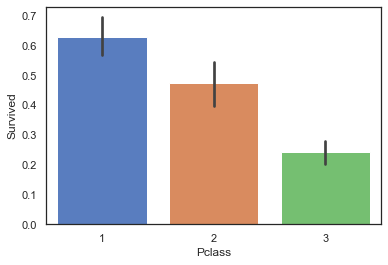

In [271]:
sns.barplot(data=train,x='Pclass',y='Survived')

'0-10 has higher serviva rate'

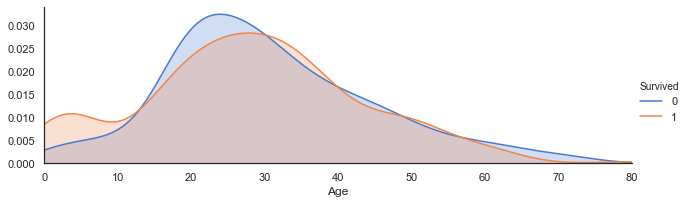

In [272]:
ageFacet=sns.FacetGrid(train,hue='Survived',aspect=3)

ageFacet.map(sns.kdeplot,'Age',shade=True)

ageFacet.set(xlim=(0,train['Age'].max()))
ageFacet.add_legend()
"""0-10 has higher serviva rate"""

'Lower fare 0-20 has lower survive rate'

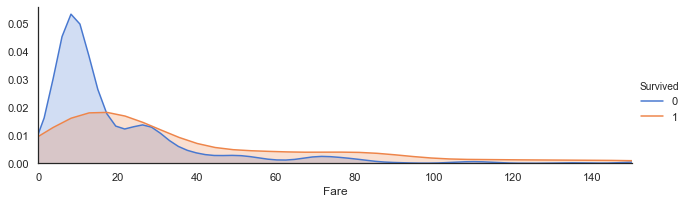

In [273]:
ageFacet=sns.FacetGrid(train,hue='Survived',aspect=3)
ageFacet.map(sns.kdeplot,'Fare',shade=True)
ageFacet.set(xlim=(0,150))
ageFacet.add_legend()
"""Lower fare 0-20 has lower survive rate"""

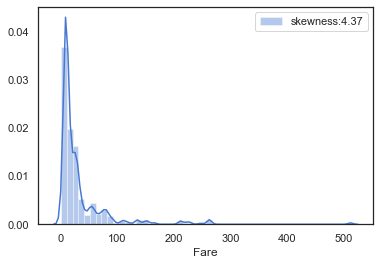

In [274]:
farePlot=sns.distplot(full['Fare'][full['Fare'].notnull()],label='skewness:%.2f'%(full['Fare'].skew()))
farePlot.legend(loc='best')

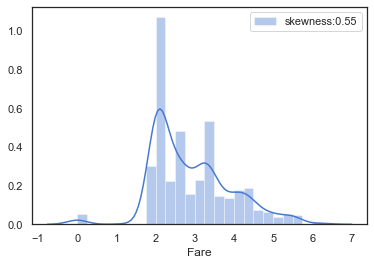

In [275]:
#due to high skew to left, we logrithmic it
full['Fare']=full['Fare'].map(lambda x: np.log(x) if x>0 else 0)
farePlot=sns.distplot(full['Fare'][full['Fare'].notnull()],label='skewness:%.2f'%(full['Fare'].skew()))
farePlot.legend(loc='best')

In [276]:
#Data preprocessing
#ETL 
#U stands for unknown
full["Cabin"] = full["Cabin"].fillna("U")


In [277]:
full[full['Embarked'].isnull()]
full['Embarked'].value_counts()

270/(914+270+123)

0.20657995409334354

In [278]:
full['Embarked']=full['Embarked'].fillna('S')

In [279]:
#3rd class from C, find mean value
full['Fare']=full['Fare'].fillna(full[(full['Pclass']==3)&(full['Embarked']=='C')&(full['Cabin']=='U')]['Fare'].mean())

In [280]:
#feature engineering
#New feature, title
full["Title"]=full["Name"].map(lambda x:x.split(",")[1].split('.')[0].strip())
full["Title"].value_counts()

TitleDict={}
TitleDict['Mr']='Mr'
TitleDict['Mlle']='Miss'
TitleDict['Miss']='Miss'
TitleDict['Master']='Master'
TitleDict['Jonkheer']='Master'
TitleDict['Mme']='Mrs'
TitleDict['Ms']='Mrs'
TitleDict['Mrs']='Mrs'
TitleDict['Don']='Royalty'
TitleDict['Sir']='Royalty'
TitleDict['the Countess']='Royalty'
TitleDict['Dona']='Royalty'
TitleDict['Lady']='Royalty'
TitleDict['Capt']='Officer'
TitleDict['Col']='Officer'
TitleDict['Major']='Officer'
TitleDict['Dr']='Officer'
TitleDict['Rev']='Officer'

full['Title']=full['Title'].map(TitleDict)
full['Title'].value_counts()

Mr         757
Miss       262
Mrs        200
Master      62
Officer     23
Royalty      5
Name: Title, dtype: int64

'Mr/Officer has lower survival rate'

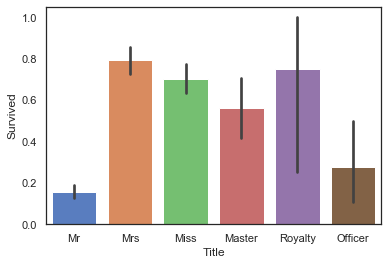

In [281]:
sns.barplot(data=full,x='Title',y='Survived')
"""Mr/Officer has lower survival rate"""

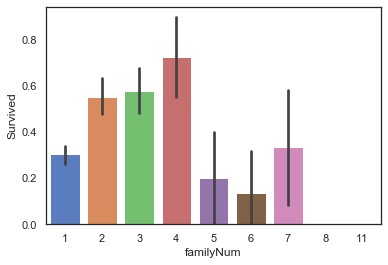

In [282]:
#family size
full['familyNum']=full['Parch']+full['SibSp']+1
sns.barplot(data=full,x='familyNum',y='Survived')

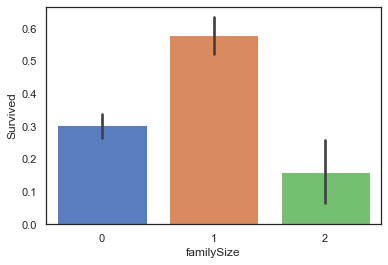

In [283]:
def familysize(familyNum):
    if familyNum==1:
        return 0
    elif (familyNum>=2)&(familyNum<=4):
        return 1
    else:
        return 2

full['familySize']=full['familyNum'].map(familysize)
full['familySize'].value_counts()
sns.barplot(data=full,x='familySize',y='Survived')

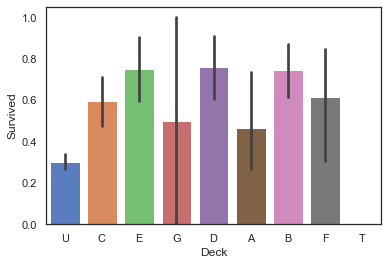

In [284]:
full['Deck']=full['Cabin'].map(lambda x:x[0])
#deck vs survival rate
sns.barplot(data=full,x='Deck',y='Survived')

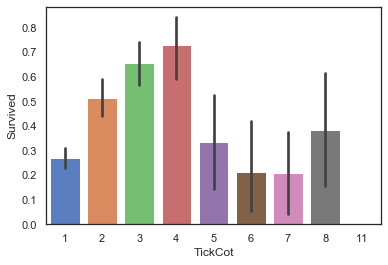

In [285]:
#提取各票号的乘客数量
TickCountDict={}
TickCountDict=full['Ticket'].value_counts()
TickCountDict.head()

full['TickCot']=full['Ticket'].map(TickCountDict)
full['TickCot'].head()

def TickCountGroup(num):
    if (num>=2)&(num<=4):
        return 0
    elif (num==1)|((num>=5)&(num<=8)):
        return 1
    else :
        return 2
full['TickGroup']=full['TickCot'].map(TickCountGroup)

sns.barplot(data=full,x='TickCot',y='Survived')

In [286]:
#Random forest for age filling
AgePre=full[['Age','Parch','Pclass','SibSp','Title','familyNum','TickCot']]

#进行one-hot编码
AgePre=pd.get_dummies(AgePre)
ParAge=pd.get_dummies(AgePre['Parch'],prefix='Parch')
SibAge=pd.get_dummies(AgePre['SibSp'],prefix='SibSp')
PclAge=pd.get_dummies(AgePre['Pclass'],prefix='Pclass')

#查看变量间相关性
AgeCorrDf=pd.DataFrame()
AgeCorrDf=AgePre.corr()
AgeCorrDf['Age'].sort_values()

AgePre=pd.concat([AgePre,ParAge,SibAge,PclAge],axis=1)
AgePre.head()

,Age,Parch,Pclass,SibSp,familyNum,TickCot,Title_Master,Title_Miss,Title_Mr,Title_Mrs,...,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Pclass_1,Pclass_2,Pclass_3
0,22.0,0,3,1,2,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
1,38.0,0,1,1,2,2,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
2,26.0,0,3,0,1,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
3,35.0,0,1,1,2,2,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,35.0,0,3,0,1,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1


In [287]:
#拆分实验集和预测集
AgeKnown=AgePre[AgePre['Age'].notnull()]
AgeUnKnown=AgePre[AgePre['Age'].isnull()]

#生成实验数据的特征和标签
AgeKnown_X=AgeKnown.drop(['Age'],axis=1)
AgeKnown_y=AgeKnown['Age']
#生成预测数据的特征
AgeUnKnown_X=AgeUnKnown.drop(['Age'],axis=1)

#利用随机森林构建模型
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(random_state=None,n_estimators=500,n_jobs=-1)
rfr.fit(AgeKnown_X,AgeKnown_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [288]:
rfr.score(AgeKnown_X,AgeKnown_y)
#age prediction
AgeUnKnown_y=rfr.predict(AgeUnKnown_X)
#fill pred to null values
full.loc[full['Age'].isnull(),['Age']]=AgeUnKnown_y

In [289]:
#peer effect

full['Surname']=full['Name'].map(lambda x:x.split(',')[0].strip())
SurNameDict={}
SurNameDict=full['Surname'].value_counts()
full['SurnameNum']=full['Surname'].map(SurNameDict)

MaleDf=full[(full['Sex']=='male')&(full['Age']>12)&(full['familyNum']>=2)]
FemChildDf=full[((full['Sex']=='female')|(full['Age']<=12))&(full['familyNum']>=2)]



In [290]:
MSurNamDf=MaleDf['Survived'].groupby(MaleDf['Surname']).mean()
MSurNamDf.head()
MSurNamDf.value_counts()

MSurNamDict={}
MSurNamDict=MSurNamDf[MSurNamDf.values==1].index


In [291]:
FCSurNamDf=FemChildDf['Survived'].groupby(FemChildDf['Surname']).mean()
FCSurNamDf.head()
FCSurNamDf.value_counts()

FCSurNamDict={}
FCSurNamDict=FCSurNamDf[FCSurNamDf.values==0].index


In [292]:
full.loc[(full['Survived'].isnull())&(full['Surname'].isin(MSurNamDict))&(full['Sex']=='male'),'Age']=5
full.loc[(full['Survived'].isnull())&(full['Surname'].isin(MSurNamDict))&(full['Sex']=='male'),'Sex']='female'

#对数据集中这些姓氏的女性及儿童的数据进行修正：1、性别改为男；2、年龄改为60。
full.loc[(full['Survived'].isnull())&(full['Surname'].isin(FCSurNamDict))&((full['Sex']=='female')|(full['Age']<=12)),'Age']=60
full.loc[(full['Survived'].isnull())&(full['Surname'].isin(FCSurNamDict))&((full['Sex']=='female')|(full['Age']<=12)),'Sex']='male'

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]),
 <a list of 9 Text xticklabel objects>)

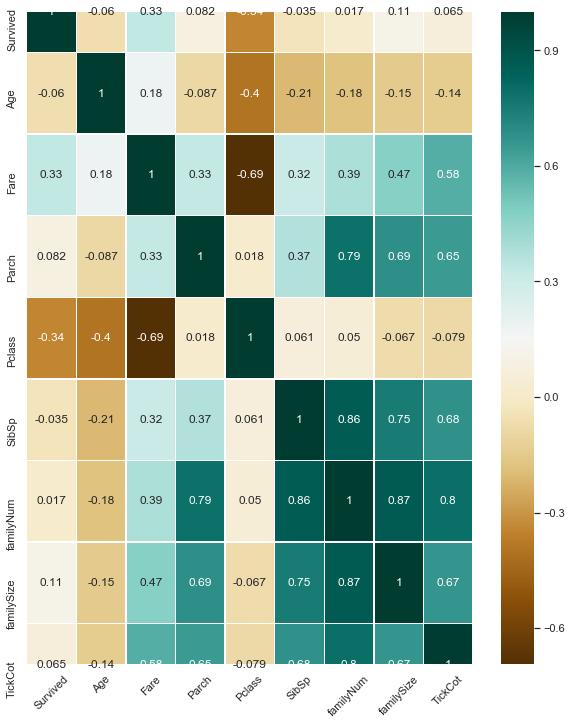

In [295]:
#correlation map
fullSel=full.drop(['Cabin','Name','Ticket','PassengerId','Surname','SurnameNum'],axis=1)

corrDf=pd.DataFrame()
corrDf=fullSel.corr()
corrDf['Survived'].sort_values(ascending=True)

plt.figure(figsize=(10,12))
sns.heatmap(fullSel[['Survived','Age','Embarked','Fare','Parch','Pclass',
                    'Sex','SibSp','Title','familyNum','familySize','Deck',
                     'TickCot','TickGroup',]].corr(),cmap='BrBG',annot=True,
           linewidths=.5)
plt.xticks(rotation=45)
#plt.tight_layout()

In [223]:
fullSel=fullSel.drop(['familyNum','SibSp','TickCot','Parch'],axis=1)
#one-hot编码
fullSel=pd.get_dummies(fullSel)
PclassDf=pd.get_dummies(full['Pclass'],prefix='Pclass')
#TickGroupDf=pd.get_dummies(full['TickGroup'],prefix='TickGroup')
familySizeDf=pd.get_dummies(full['familySize'],prefix='familySize')

fullSel=pd.concat([fullSel,PclassDf,familySizeDf],axis=1)

In [224]:
#build the models and compare
#拆分实验数据与预测数据
experData=fullSel[fullSel['Survived'].notnull()]
preData=fullSel[fullSel['Survived'].isnull()]

experData_X=experData.drop('Survived',axis=1)
experData_y=experData['Survived']
preData_X=preData.drop('Survived',axis=1)

#导入机器学习算法库
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,cross_val_score,StratifiedKFold

#设置kfold，交叉采样法拆分数据集
kfold=StratifiedKFold(n_splits=10)

#汇总不同模型算法
classifiers=[]
classifiers.append(SVC())
classifiers.append(DecisionTreeClassifier())
classifiers.append(RandomForestClassifier())
classifiers.append(ExtraTreesClassifier())
classifiers.append(GradientBoostingClassifier())
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression())
classifiers.append(LinearDiscriminantAnalysis())

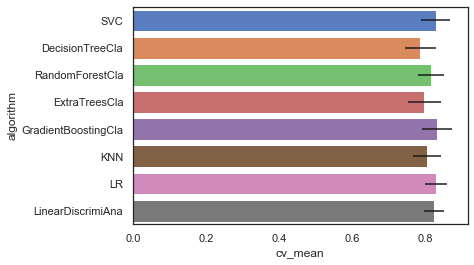

In [228]:
cv_results=[]
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier,experData_X,experData_y,
                                      scoring='accuracy',cv=kfold,n_jobs=-1))
cv_means=[]
cv_std=[]
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())
    
#汇总数据
cvResDf=pd.DataFrame({'cv_mean':cv_means,
                     'cv_std':cv_std,
                     'algorithm':['SVC','DecisionTreeCla','RandomForestCla','ExtraTreesCla',
                                  'GradientBoostingCla','KNN','LR','LinearDiscrimiAna']})

cvResDf  
sns.barplot(data=cvResDf,x='cv_mean',y='algorithm',**{'xerr':cv_std})

In [408]:
cvResDf  

,cv_mean,cv_std,algorithm
0,0.828273,0.040199,SVC
1,0.786850,0.043195,DecisionTreeCla
2,0.815888,0.036101,RandomForestCla
3,0.798011,0.044715,ExtraTreesCla
4,0.831694,0.040614,GradientBoostingCla
5,0.805863,0.038105,KNN
6,0.829421,0.029056,LR
7,0.823841,0.027174,LinearDiscrimiAna


In [229]:
#model tunning
GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }
modelgsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, 
                                     scoring="accuracy", n_jobs= -1, verbose = 1)
modelgsGBC.fit(experData_X,experData_y)

#LogisticRegression模型
modelLR=LogisticRegression()
LR_param_grid = {'C' : [1,2,3],
                'penalty':['l1','l2']}
modelgsLR = GridSearchCV(modelLR,param_grid = LR_param_grid, cv=kfold, 
                                     scoring="accuracy", n_jobs= -1, verbose = 1)
modelgsLR.fit(experData_X,experData_y)

Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:   18.0s
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:   33.5s finished


Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.4s finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [1, 2, 3], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [405]:
#modelgsGBC模型
print('modelgsGBC score：%.3f'%modelgsGBC.best_score_)
#modelgsLR模型
print('modelgsLR score：%.3f'%modelgsLR.best_score_)

modelgsGBC.best_estimator_ 

modelgsGBC score：0.842
modelgsLR score：0.832


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=4,
              max_features=0.3, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=100, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=300,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

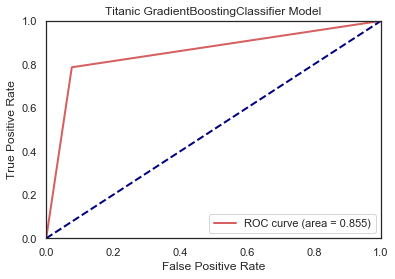

In [409]:
#ROC curve
modelgsGBCtestpre_y=modelgsGBC.predict(experData_X).astype(int)
modelgsLRtestpre_y=modelgsLR.predict(experData_X).astype(int)

from sklearn.metrics import roc_curve, auc
# Compute ROC curve and ROC area for each class
fpr,tpr,threshold = roc_curve(experData_y, modelgsGBCtestpre_y) 
roc_auc = auc(fpr,tpr) 

plt.figure()
lw = 2
#plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='r',
         lw=lw, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Titanic GradientBoostingClassifier Model')
plt.legend(loc="lower right")
plt.show()

In [391]:
from sklearn.metrics import confusion_matrix
print('GradientBoostingClassifier Confusion Matrix\n',confusion_matrix(experData_y.astype(int).astype(str),modelgsGBCtestpre_y.astype(str)))
print('LinearRegression Confusion Matrix\n',confusion_matrix(experData_y.astype(int).astype(str),modelgsLRtestpre_y.astype(str)))

GradientBoostingClassifier Confusion Matrix
 [[507  42]
 [ 73 269]]
LinearRegression Confusion Matrix
 [[480  69]
 [ 80 262]]


In [407]:
69 / 342

0.20175438596491227

In [235]:
#result and discussion
#TitanicGBSmodle
GBCpreData_y=modelgsGBC.predict(preData_X)
GBCpreData_y=GBCpreData_y.astype(int)
#导出预测结果
GBCpreResultDf=pd.DataFrame()
GBCpreResultDf['PassengerId']=full['PassengerId'][full['Survived'].isnull()]
GBCpreResultDf['Survived']=GBCpreData_y
GBCpreResultDf
#将预测结果导出为csv文件
GBCpreResultDf.to_csv('data/TitanicGBSmodel.csv',index=False)

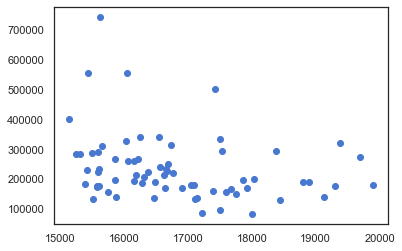

In [338]:

train_hp = pd.read_csv("data/trainhouseprice.csv")
#train_hp.info()  

x = train_hp[train_hp["LotArea"]<20000][train_hp["LotArea"]>15000]["LotArea"]
y = train_hp[train_hp["LotArea"]<20000][train_hp["LotArea"]>15000]["SalePrice"]
plt.scatter(x,y)
x=np.array(x).reshape((69,1))
y=np.array(y).reshape((69,1))

In [340]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(x, y) #training the algorithm
y_pred = regressor.predict(x)

In [351]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))  
print("fraction:", metrics.mean_squared_error(y, y_pred)/metrics.mean_absolute_error(y, y_pred))

Mean Absolute Error: 73709.81663319696
Mean Squared Error: 11690911976.829996
fraction: 158607.25898977095


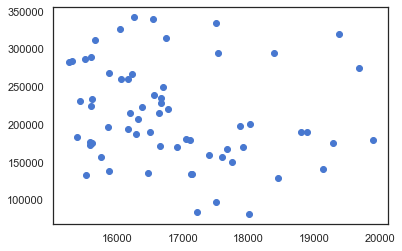

In [359]:
x_1 = train_hp[train_hp["LotArea"]<20000][train_hp["LotArea"]>15000][train_hp["SalePrice"]<350000]["LotArea"]
y_1 = train_hp[train_hp["LotArea"]<20000][train_hp["LotArea"]>15000][train_hp["SalePrice"]<350000]["SalePrice"]
plt.scatter(x_1,y_1)

x_1=np.array(x_1).reshape((64,1))
y_1=np.array(y_1).reshape((64,1))

regressor = LinearRegression()  
regressor.fit(x_1, y_1) #training the algorithm
y_pred = regressor.predict(x_1)

In [361]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_1, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_1, y_pred))  
print("fraction:", metrics.mean_squared_error(y_1, y_pred)/metrics.mean_absolute_error(y_1, y_pred))

Mean Absolute Error: 50687.2169787383
Mean Squared Error: 4029926730.5925207
fraction: 79505.78017102317


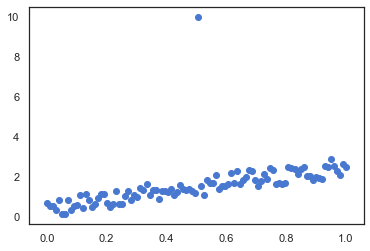

In [376]:
def create_linear_data(nums_data, if_plot=False):
    """
    Create data for linear model
    Args:
        nums_data: how many data points that wanted
    Returns:
        x with shape (nums_data, 1)
    """
    x = np.linspace(0,1,num = nums_data)
    noise = np.random.random_sample(size=nums_data)
    k=2
    data = k*x+noise 
    return np.array(x).reshape(-1,1),np.array(data).reshape(-1,1)
x,y= create_linear_data(100)

y[50]=10

plt.scatter(x,y)


In [383]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(x, y) #training the algorithm
y_pred = regressor.predict(x)
y[50]=10
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))  
print("fraction:", metrics.mean_squared_error(y, y_pred)/metrics.mean_absolute_error(y, y_pred))

print("no outlier\n")
regressor = LinearRegression()  
regressor.fit(x, y) #training the algorithm
y_pred = regressor.predict(x)
y[50]=1
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))  
print("fraction:", metrics.mean_squared_error(y, y_pred)/metrics.mean_absolute_error(y, y_pred))

from sklearn.linear_model import Lasso
print("Lasso \n")
regressor = Lasso()  
y[50]=10
regressor.fit(x, y) #training the algorithm
y_pred = regressor.predict(x)
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))  
print("fraction:", metrics.mean_squared_error(y, y_pred)/metrics.mean_absolute_error(y, y_pred))

print("no outlier\n")
regressor = Lasso()  
y[50]=1
regressor.fit(x, y) #training the algorithm
y_pred = regressor.predict(x)
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))  
print("fraction:", metrics.mean_squared_error(y, y_pred)/metrics.mean_absolute_error(y, y_pred))

Mean Absolute Error: 0.3115349626213928
Mean Squared Error: 0.799645481827698
fraction: 2.5667921028802922
no outlier

Mean Absolute Error: 0.24279057984858762
Mean Squared Error: 0.08358180900085795
fraction: 0.3442547443685104
Lasso 

Mean Absolute Error: 0.6271955110340786
Mean Squared Error: 1.144440758239203
fraction: 1.8246953909990917
no outlier

Mean Absolute Error: 0.5440870803301932
Mean Squared Error: 0.42652735239056483
fraction: 0.7839321458096667


In [384]:
0.7996/0.3115

2.5669341894060995